In [1]:
import logging
import numpy as np
import scipy.stats as sps
from scipy.ndimage import gaussian_filter

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import pandas

%matplotlib inline
plt.rcParams['font.size'] = 12
plt.rcParams['image.cmap'] = 'jet'

logging.basicConfig()

In [2]:
from gpx_processor import GPXProcessor

In [3]:
gpx_processor = GPXProcessor()

In [6]:
gpx_files = ['gpx_files/run-20170320T185959.gpx', 'gpx_files/run-20170322T185334.gpx', 'gpx_files/run-20170325T163456.gpx'] 

In [7]:
df = gpx_processor.process_files(gpx_files)

3it [00:06,  2.19s/it]


In [8]:
print(df['segment'].max() + 1)
print(df['track'].max() + 1)

2
3


In [9]:
df.head()

,track,segment,point,latitude,longitude,elevation,time,speed,distance,heart_rate,pace,total_distance,x,y
0,0,0,0,59.336549,18.036276,17.0,2017-03-20 18:01:59,NaN,0.000000,117,NaN,0.000000,-1015.365872,753.312512
1,0,0,1,59.336548,18.036319,16.8,2017-03-20 18:02:00,2.448271,2.447552,114,6.807525,2.447552,-1012.924177,753.201193
2,0,0,2,59.336546,18.036362,16.7,2017-03-20 18:02:01,2.536463,2.448990,113,6.570830,4.896542,-1010.482483,752.978554
3,0,0,3,59.336544,18.036408,16.5,2017-03-20 18:02:02,2.652090,2.623936,114,6.284351,7.520478,-1007.870437,752.755915
4,0,0,4,59.336542,18.036455,16.3,2017-03-20 18:02:03,2.742092,2.680245,114,6.078085,10.200723,-1005.201609,752.533276


In [10]:
df.tail()

,track,segment,point,latitude,longitude,elevation,time,speed,distance,heart_rate,pace,total_distance,x,y
3317,2,1,2788,59.338628,18.024434,20.4,2017-03-25 16:32:33,3.453567,3.453566,169,4.825928,9988.172481,-1687.797177,984.745637
3318,2,1,2789,59.338617,18.024491,20.4,2017-03-25 16:32:34,3.434694,3.453567,169,4.852445,9991.626048,-1684.560512,983.521123
3319,2,1,2790,59.338607,18.024548,20.4,2017-03-25 16:32:35,3.415822,3.415821,168,4.879255,9995.041869,-1681.323847,982.407929
3320,2,1,2791,59.338597,18.024605,20.4,2017-03-25 16:32:36,3.399304,3.415822,166,4.902964,9998.457691,-1678.087183,981.294734
3321,2,1,2792,59.338588,18.024662,20.3,2017-03-25 16:32:37,3.382786,3.382786,164,4.926905,10001.840476,-1674.850518,980.292859


In [11]:
plot_data = df  #[df['segment'] == 0]

In [12]:
print(plot_data['longitude'].min())
print(plot_data['longitude'].max())

print(plot_data['latitude'].min())
print(plot_data['latitude'].max())

17.996669
18.067668
59.319085
59.340763


In [15]:
print('Average speed: %.2f km/h' % (np.nanmean(plot_data['speed']) * 3.6))
print('Average pace: %.2f min'% np.nanmean(plot_data['pace']))

# maybe INCORRECT if track has multiple segements

Average speed: 10.92 km/h
Average pace: 5.73 min


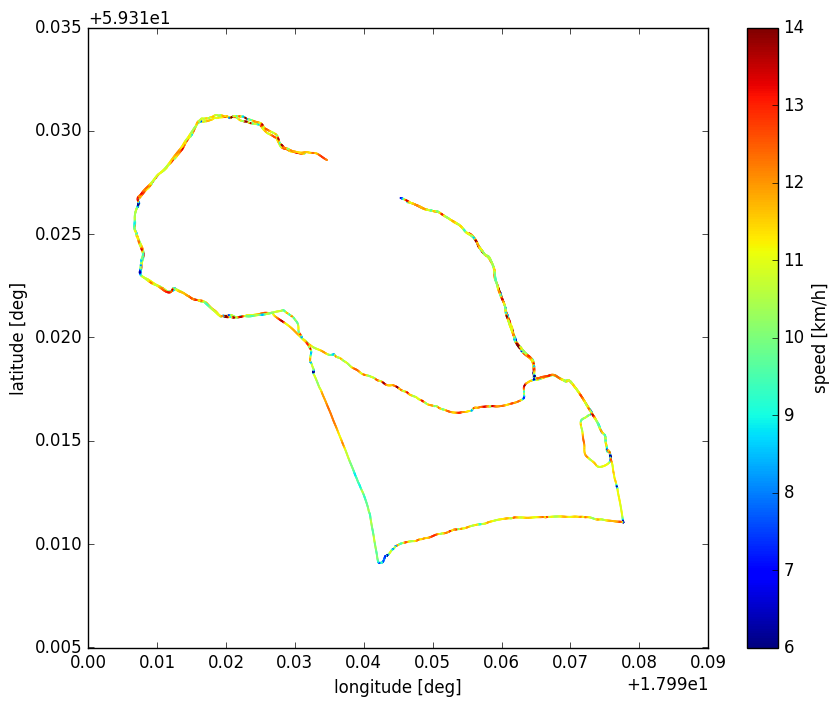

In [16]:
plt.figure(figsize=(10,8))
plt.scatter(plot_data['longitude'],
            plot_data['latitude'],
            c=np.clip(plot_data['speed']*3.6, 6, 14), s=2, lw=0)
plt.colorbar(label='speed [km/h]')
plt.xlabel('longitude [deg]')
plt.ylabel('latitude [deg]')
plt.show()

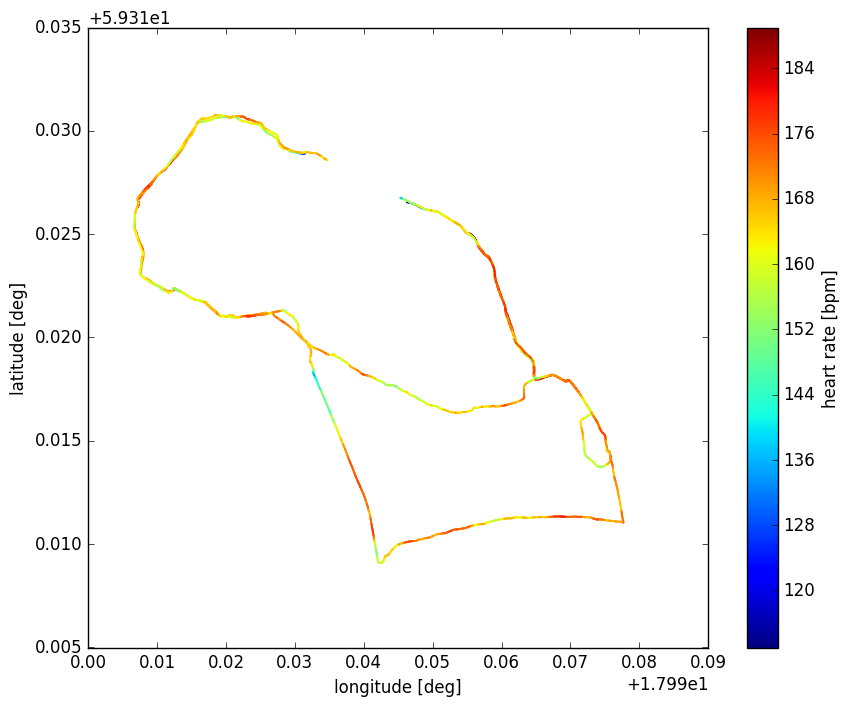

In [17]:
plt.figure(figsize=(10,8))
plt.scatter(plot_data['longitude'],
            plot_data['latitude'],
            c=plot_data['heart_rate'], s=2, lw=0)
plt.colorbar(label='heart rate [bpm]')
plt.xlabel('longitude [deg]')
plt.ylabel('latitude [deg]')
plt.show()

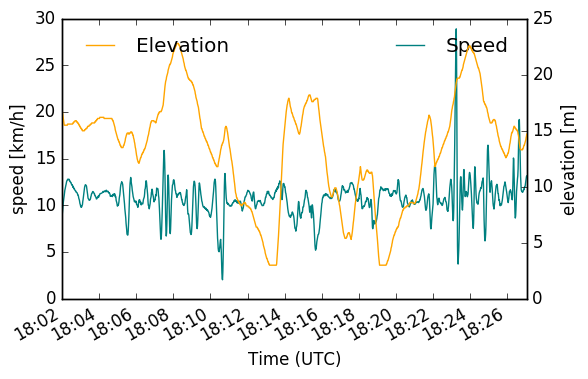

In [21]:
plot_data2 = df[df['track'] == 0]

plt.figure()
plt.plot(plot_data2['time'], plot_data2['speed']*3.6, color='teal', label='Speed')
plt.ylabel('speed [km/h]')
plt.legend(loc='upper right', ncol=1, frameon=0)
plt.xlabel("Time (UTC)")
plt.twinx()
plt.plot(plot_data2['time'], plot_data2['elevation'], color='orange', label='Elevation')
#plt.plot(plot_data['time'], plot_data['heart_rate'], label='heart rate')

plt.ylabel('elevation [m]')

plt.legend(loc='upper left', ncol=1, frameon=0)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=2))
plt.gcf().autofmt_xdate()
#plt.title("Speed vs time")
plt.xlabel("Time (UTC)")
#plt.ylabel("Speed [km/h]")
plt.show()


In [22]:
# low pass filter
df['smooth'] = gaussian_filter(df['speed'], 6)

In [24]:
plot_data = df[df['track'] == 0]

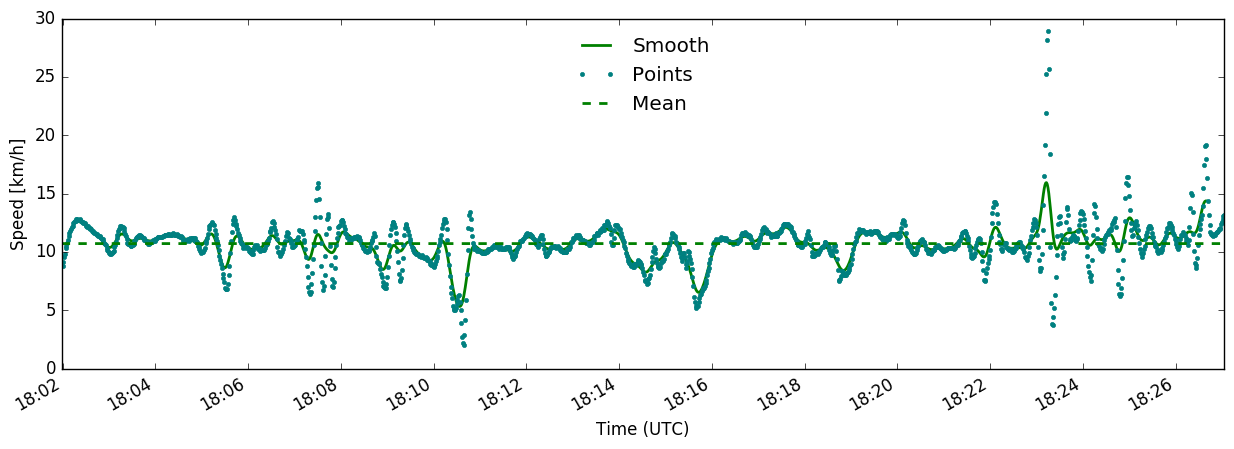

In [25]:
plt.figure(figsize=(15,5))
plt.plot(plot_data['time'], 3.6 * plot_data['smooth'], 'g-', label='Smooth', linewidth=2)
plt.plot(plot_data['time'], 3.6 * plot_data['speed'], '.', color='teal', label='Points')
plt.plot(plot_data['time'], [3.6 * np.nanmean(plot_data['speed'])] * len(plot_data['speed']), 'g--',  label='Mean', linewidth=2)

plt.legend(loc='upper center', ncol=1, frameon=0)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=2))
plt.gcf().autofmt_xdate()
#plt.title("Speed vs time")
plt.xlabel("Time (UTC)")
plt.ylabel("Speed [km/h]")
plt.show()

In [26]:
# Plot on google maps

In [27]:
import gmplot

In [28]:
gmap = gmplot.GoogleMapPlotter(np.nanmean(plot_data['latitude']), np.nanmean(plot_data['longitude']), 15)

In [29]:
gmap.plot(plot_data['latitude'].values, plot_data['longitude'].values, 'cornflowerblue', edge_width=4)
#gmap.heatmap(plot_data['latitude'].values, plot_data['longitude'])  #.values, size=1, marker=False)
gmap.draw('test.html')